#  Demo: Binary Logistic Regression in One Dimension

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

## The Logistic Model

This demo helps to visualize an important classification method known as *binary logistic regression*. 
Logistic regression does not model the binary label $y\in\{-1,1\}$ as a deterministic function of the features $\boldsymbol{x}=[x_1,\dots,x_d]^T$, nor as a deterministic function of $\boldsymbol{x}$ plus additive random noise like we did with linear regression. 
Instead, it models $y$ as random with a *probability* that is determined by $\boldsymbol{x}$ through
$$
    Pr\{y = 1|\boldsymbol{x}\} .
$$

In particular, the logistic model says that this probability is completely determined by the linear *score* or *discriminant* $z$:
\begin{align}
    \\
    Pr\{y=1|\boldsymbol{x}\} = f(z), \quad z = b + w_1x_1 + \cdots + w_d x_d ,
    \\ \mbox{}
\end{align}
where $b$ is the intercept term (or *bias*), $w_1,\ldots,w_d$ are the classifier weights, and $f(\cdot)$ is 
$$
    \\
    f(z) = \frac{1}{1+e^{-z}},
    \\ \mbox{}
$$
which is known as the *logistic function* or the *sigmoid*.  We plot $f(z)$ below.

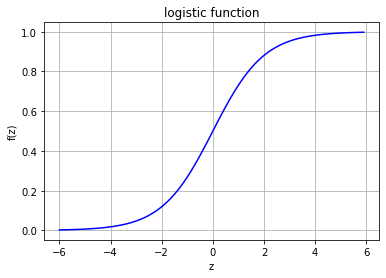

In [2]:
def f(z):
    return 1/(1+np.exp(-z))

z = np.arange(-6,6,0.1)
plt.plot(z,f(z),'b-')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('logistic function')
plt.grid();

To illustrate the workings of the logistic function, this demo considers the simple case that $d=1$ (i.e., one scalar feature). In this case, we can write
$$
    z = b + w x.
$$
We'd like to understand the roles of $b$ and $w$, as well as how to fit these parameters to data.

## Effect of weight and intercept

To understand the effect of the weight $w$, we first set the intercept to zero (i.e., $b=0$).
Below, we plot $Pr\{y=1|x\}=f(wx)$ versus $x$ for three different values of $w$.

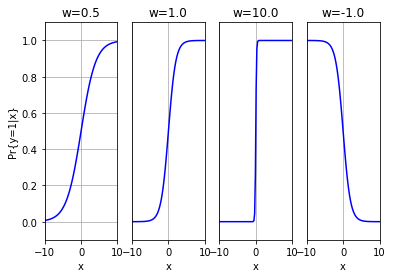

In [3]:
nx = 100
xmax = 10
x = np.linspace(-xmax,xmax,100)

w1s = np.array([0.5,1,10,-1])
nplot = w1s.size

for iplot,w1 in enumerate(w1s):
    py = f(w1*x)
    
    plt.subplot(1,nplot,iplot+1)
    plt.plot(x,py,'b-')
    plt.axis([-xmax,xmax,-0.1,1.1])
    plt.grid()
    if (iplot == 0):
        plt.ylabel('Pr{y=1|x}')
    else:
        plt.yticks([])
    plt.xticks([-10,0,10])
    plt.xlabel('x')
    plt.title('w={0:.1f}'.format(w1))


The figures above show that, when $w$ is positive, $P\{y=1|x\}$ transitions monotonically from low to high as $x$ increases.
Meanwhile, when $w$ is negative, $P\{y=1|x\}$ transitions monotonically from high to low as $x$ increases.
Furthermore, the speed of the transition is proportional to the magnitude of $w$.

In all of these plots, $P\{y=1|x\}=0.5$ when $x=0$. This is a consequence of the fact that we used $b=0$ for these plots.

Below is an interactive demonstration of these concepts, where you can select any values of $b$ and $w$.  By adjusting $b$, you can see the curve shift from left to right, and by adjusting $w$, you can see the transition sharpen. 

By writing $z=b+wx = w(\frac{b}{w}+x)$ and recognizing that $\Pr\{y=1|x\}=0.5$ whenever $z=0$, we can see that $\Pr\{y=1|x\}=0.5$ whenever $x=-\frac{b}{w}$.

In [4]:
from ipywidgets import interact


def update_w(b,w):
    xmax = 5
    x = np.linspace(-xmax,xmax,100)
    py = 1/(1+np.exp(-(b+w*x)))
    plt.plot(x,py)
    plt.grid()
    plt.title('b={0}, w={1}'.format(b,w))
    plt.xlabel('x')
    plt.ylabel('Pr{y=1|x}')
    plt.axis([-xmax,xmax,-0.1,1.1])
    
interact(update_w, w = (-9,11), b = (-10,10));

interactive(children=(IntSlider(value=0, description='b', max=10, min=-10), IntSlider(value=1, description='w'…

## Demonstration on a Balanced Dataset

Next we use a simple data-fitting problem to illustrate the advantages of logistic regression over least-squares (LS) linear regression for binary classification.

We start with a "balanced" dataset, which consists of the eight $(x_i,y_i)$ samples shown in the scatter plot below.

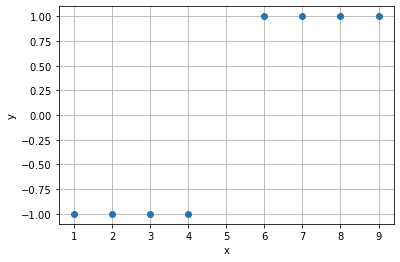

In [5]:
xvec = np.array([ 1, 2, 3, 4, 6, 7, 8, 9]) 
yvec = np.array([-1,-1,-1,-1, 1, 1, 1, 1])

plt.plot(xvec,yvec,'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y');

Just by looking at the dataset, we can see that a good rule would be to predict $y=1$ whenever $x>5$ and $y=-1$ when $x<5$.

### Try LS Linear Regression

Let's first try fitting a LS linear regression model to the data, to see if it behaves as expected.  

Now, LS linear regression will return a real-number prediction, not a binary prediction as we desire for classification.  To address this issue, we quantize the LS linear prediction (call it $\hat{z}$) to $\hat{y}=1$ whenever $\hat{z}\geq 0$ and to $\hat{y}=-1$ whenever $\hat{z}<0$.  

Below, we fit the LS-linear model and plot $\hat{z}$ and $\hat{y}$ as a function of a test feature $x$.

In [6]:
from sklearn import datasets, linear_model

linreg = linear_model.LinearRegression()
linreg.fit(xvec.reshape(-1, 1),yvec)
b = float(linreg.intercept_)
w = float(linreg.coef_)
print('b=',b)
print('w=',w)

b= -1.6666666666666672
w= 0.3333333333333334


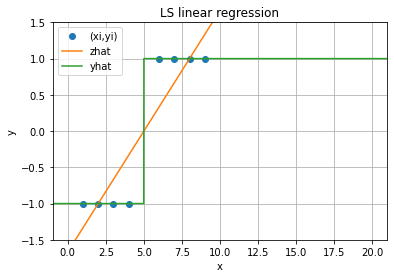

In [7]:
xmin = 0
xmax = 20
x = np.arange(xmin-1,xmax+1,0.01)
zhat = linreg.predict(x.reshape(-1,1))
yhat = 2*np.array(zhat >= 0) - 1

plt.plot(xvec,yvec,'o',label='(xi,yi)')
plt.plot(x,zhat,label='zhat')
plt.plot(x,yhat,label='yhat')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('LS linear regression')
plt.legend()
plt.axis([xmin-1,xmax+1,-1.5,1.5]);

The plot above shows that LS linear regression works perfectly well. It places the decision boundary where we expect and perfectly classifies all the training samples.

But is this always the case?  We shall see below that the answer is "no"!

## Demonstration on an Imbalanced Dataset

Next we create an "imbalanced" dataset by moving one sample far to the right:

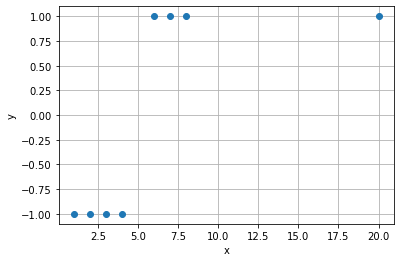

In [8]:
xvec = np.array([ 1, 2, 3, 4, 6, 7, 8, 20]) 
yvec = np.array([-1,-1,-1,-1, 1, 1, 1, 1])

plt.plot(xvec,yvec,'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y');

### Try LS Linear Regression

Again, we fit a LS linear regression model to the data and plot the score $\hat{z}$ and the prediction $\hat{y}$ as a function of a test feature $x$.

In [9]:
from sklearn import datasets, linear_model

linreg = linear_model.LinearRegression()
linreg.fit(xvec.reshape(-1, 1),yvec)
b = float(linreg.intercept_)
w = float(linreg.coef_)
print('b=',b)
print('w=',w)

b= -0.7784342688330871
w= 0.12210733628754307


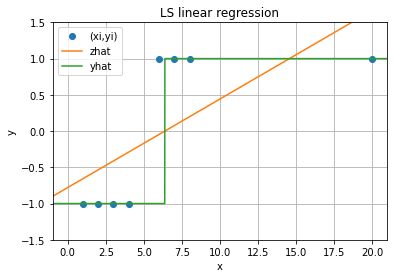

In [10]:
xmin = 0
xmax = 20
x = np.arange(xmin-1,xmax+1,0.01)
zhat = linreg.predict(x.reshape(-1,1))
yhat = 2*np.array(zhat >= 0) - 1

plt.plot(xvec,yvec,'o',label='(xi,yi)')
plt.plot(x,zhat,label='zhat')
plt.plot(x,yhat,label='yhat')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('LS linear regression')
plt.legend()
plt.axis([xmin-1,xmax+1,-1.5,1.5]);

The plot above shows that LS linear regression no longer works as we would like. The LS regression line (i.e., $\hat{z}(x)=\hat{b}+\hat{w}x$) is pulled to the right in order to fit the $(x_i,y_i)=(20,1)$ sample.  As a result, the zero-crossing of $\hat{z}(x)$ occurs at $x=6.25$ and not at $x=5$, as desired. This behavior will result whenever there is an imbalance in feature values between the two classes.

### Try Logistic Regression

Next we will fit a logistic regression model to the dataset.  The `sklearn` module provides a `LogisticRegression` method to do this.  The interface is almost identical to the `LinearRegression` method that we used above.

In [11]:
logreg = linear_model.LogisticRegression()
logreg.fit(xvec.reshape(-1, 1),yvec)
b = float(logreg.intercept_)
w = float(logreg.coef_)
print('b=',b)
print('w=',w)

b= -5.62241853945352
w= 1.120879185970028


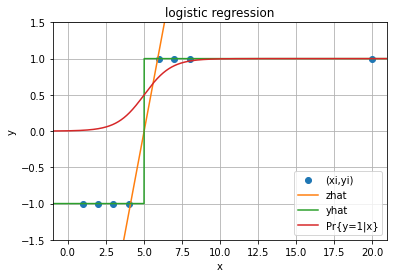

In [12]:
yhat = logreg.predict(x.reshape(-1,1))
zhat = b + w*x

plt.plot(xvec,yvec,'o',label='(xi,yi)')
plt.plot(x,zhat,label='zhat')
plt.plot(x,yhat,label='yhat')
plt.plot(x,f(zhat),label='Pr{y=1|x}')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('logistic regression')
plt.legend()
plt.axis([xmin-1,xmax+1,-1.5,1.5]);

The plot above shows that, when $b$ and $w$ are fit using logistic regression, the binary predictions $\hat{y}$ are exactly what we would like, even though the dataset is imbalanced.  Similarly, the score $\hat{z}=\hat{b}+\hat{w}x$ has a zero-crossing at the desired location, $x=5$.
Essentially, logistic regression is not distracted by the $(x_i,y_i)=(20,1)$ sample in the way that LS linear regression is.

The plot also shows the probability $Pr\{y=1|x\}$ for the fitted model.  It shows a smooth transition centered at $x=5$, which is the boundary between the positive and negative training samples.

Note that sklearn's implementation of logistic regression uses L2 regularization by default with inverse regularization strength `C=1`.  If you use other values of `C` in the above code, you will see the sharpness of the regression change, but the zero-crossing will remain at the desired location of $x=5$.